<a href="https://colab.research.google.com/github/sathvikb007/IMDB_sentiment_analysis/blob/branch1/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.python.keras.datasets import imdb
number_of_words = 10000
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=number_of_words)

17465344/17464789 [==============================] - 0s 0us/step


In [2]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
reverse_word_index = dict((value,key) for key, value in word_index.items())

def decode(review): #Function to read text from the set of values
  text=""
  for i in review:
    text += reverse_word_index[i]
    text += ' '
  return text

In [4]:
decode(x_train[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(x_train, value = 1, padding = 'post')
X_test = pad_sequences(x_test, value = 1, padding = 'post')

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D

embedding_dim = 16

model = Sequential([
    Embedding(number_of_words, embedding_dim),
    GlobalAveragePooling1D(),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid')
])

h = model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 15)                255       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 16        
Total params: 160,271
Trainable params: 160,271
Non-trainable params: 0
_________________________________________________________________


In [15]:


num_epochs = 20

h = model.fit(
    X_train, y_train,
    validation_split = 0.2,
    epochs = num_epochs,
    #callbacks = [simple_log],
    #verbose = False
)

Epoch 1/25
625/625 [==============================] - 5s 9ms/step - loss: 0.6904 - accuracy: 0.5397 - val_loss: 0.6792 - val_accuracy: 0.5812
Epoch 2/25
625/625 [==============================] - 5s 8ms/step - loss: 0.6152 - accuracy: 0.7209 - val_loss: 0.5275 - val_accuracy: 0.8098
Epoch 3/25
625/625 [==============================] - 5s 8ms/step - loss: 0.4530 - accuracy: 0.8353 - val_loss: 0.4021 - val_accuracy: 0.8548
Epoch 4/25
625/625 [==============================] - 6s 9ms/step - loss: 0.3555 - accuracy: 0.8705 - val_loss: 0.3504 - val_accuracy: 0.8676
Epoch 5/25
625/625 [==============================] - 5s 9ms/step - loss: 0.3058 - accuracy: 0.8875 - val_loss: 0.3207 - val_accuracy: 0.8780
Epoch 6/25
625/625 [==============================] - 5s 8ms/step - loss: 0.2761 - accuracy: 0.8960 - val_loss: 0.3059 - val_accuracy: 0.8824
Epoch 7/25
625/625 [==============================] - 5s 8ms/step - loss: 0.2518 - accuracy: 0.9064 - val_loss: 0.3006 - val_accuracy: 0.8808
Epoch 

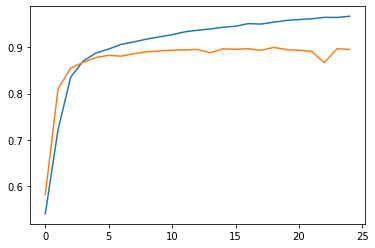

In [20]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.plot(range(num_epochs), h.history['accuracy'], label = 'Training')
plt.plot(range(num_epochs), h.history['val_accuracy'], label = 'Testing')

In [22]:
loss, acc = model.evaluate(X_train, y_train)
val_loss, val_acc = model.evaluate(X_test, y_test)
print("Training set accuracy = ", acc*100)
print("Test set accuracy = ", val_acc*100)

782/782 [==============================] - 3s 4ms/step - loss: 0.3689 - accuracy: 0.8778
Training set accuracy =  95.51600217819214
Test set accuracy =  87.77599930763245
